# Aumentación de una imagen

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from matplotlib import pyplot as plt

import skimage.io

image_filename = "https://www.avesargentinas.org.ar/sites/default/files/WhatsApp%20Image%202018-08-30%20at%2018.59.08.jpeg"
image_numpy = skimage.io.imread( image_filename )
image_numpy=np.expand_dims(image_numpy,0)
print("Image size", image_numpy.shape)

# Create object that augments data
# Transformations are random (rerun to get different results)
# Documentation: https://keras.io/api/preprocessing/image/#imagedatagenerator-class
data_generator = ImageDataGenerator(
        width_shift_range=[-200,200], # move image right or left
        height_shift_range=[-1,1], # move image up or down
          rotation_range=0.1, # rotate image (angles)
          shear_range=0.1,  # deform image
          zoom_range=0.1, # zoom-in image
        horizontal_flip=False, 
        vertical_flip=False, 
        brightness_range=[0.9,1.1],# change the brightness of all pixels at the same time
        rescale=None,)


# Obtain an iterator from the data_generator
shuffle=False # change to True so that the generated images are always different
samples_iterator = data_generator.flow(image_numpy, batch_size=1,shuffle=shuffle)

# Plot generated samples
rows,cols = 5,5
f,ax=plt.subplots(rows,cols,figsize=(rows*1.5,cols*1.5))
for i in range(rows):
  for j in range(cols):
	
    # generate batch of images
    x = samples_iterator.next()
    # convert to unsigned integers for viewing
    image = x[0].astype('uint8')
    # plot raw pixel data
    ax[i,j].imshow(image)


# Aumentación de un lote de imágenes

Image sizes: (50000, 32, 32, 3)


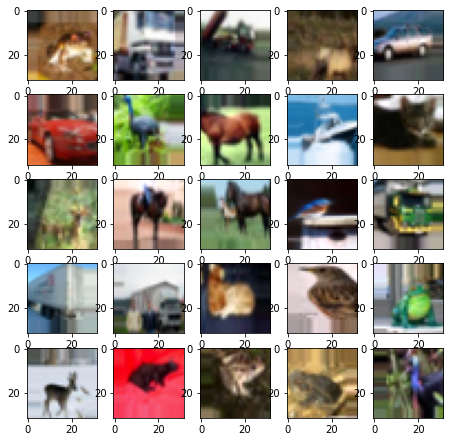

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("Image sizes:", x_train.shape)

# Create object that augments data
# Transformations are random (rerun to get different results)
# Documentation: https://keras.io/api/preprocessing/image/#imagedatagenerator-class
data_generator = ImageDataGenerator(
        width_shift_range=[-4,4], # move image right or left
        height_shift_range=[-4,4], # move image up or down
          rotation_range=0.1, # rotate image (angles)
          shear_range=0.1,  # deform image
          zoom_range=0.2, # zoom-in image
        horizontal_flip=True, 
        vertical_flip=False, 
        brightness_range=[0.9,1.1],# change the brightness of all pixels at the same time
        rescale=None,)


# Obtain an iterator from the data_generator
shuffle=False # change to True so that the generated images are always different
samples_iterator = data_generator.flow(x_train,y_train, batch_size=1,shuffle=shuffle)

# Plot generated samples
rows,cols = 5,5
f,ax=plt.subplots(rows,cols,figsize=(rows*1.5,cols*1.5))
for i in range(rows):
  for j in range(cols):
    # generate batch of images
    x,y = samples_iterator.next()
    # convert to unsigned integers for viewing
    image = x[0].astype('uint8')
    # plot raw pixel data
    ax[i,j].imshow(image)
